In [39]:
import os
import pandas as pd

# Path to the folder containing the CSV files
input_folder = '.'

# List to store each year's data
all_years_data = []

# Load each CSV file and append it to the list
for file_name in os.listdir(input_folder):
    if file_name.endswith('_Limited_Access_to_Healthy_Foods.csv'):
        file_path = os.path.join(input_folder, file_name)
        year = file_name.split('_')[0]  # Assuming the year is the first part of the filename
        df = pd.read_csv(file_path)
        df['Year'] = int(year)  # Add the year as a new column
        all_years_data.append(df)

# Combine all years into a single DataFrame
combined_df = pd.concat(all_years_data, ignore_index=True)


In [40]:
# Filter the combined data for the year 2015
df_2015 = combined_df[combined_df['Year'] == 2015]

# Define categories based on % rural
rural = df_2015['% Rural'] > 66
middle = (df_2015['% Rural'] > 33) & (df_2015['% Rural'] <= 66)
city = df_2015['% Rural'] <= 33

# Add a new column for rural, middle, city level
df_2015.loc[rural, 'Area Type'] = 'Rural'
df_2015.loc[middle, 'Area Type'] = 'Middle'
df_2015.loc[city, 'Area Type'] = 'City'


/var/folders/cv/0rgfl8cs40g0lnwkzp8sskhh0000gn/T/ipykernel_52063/2093520846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2015.loc[rural, 'Area Type'] = 'Rural'


In [48]:
df_2015.iloc[54]

FIPS                                             8105.0
State                                          Colorado
County                                       Rio Grande
% Limited Access to Healthy Foods                   NaN
% Adults with Diabetes                              NaN
% Rural                                        62.53547
Median Household Income                             NaN
Average Number of Mentally Unhealthy Days           NaN
Food Environment Index                              7.8
Income Ratio                                   4.091886
Parish                                              NaN
Borough                                             NaN
Year                                               2015
% Limited Access                               2.324295
% Diabetic                                          7.1
Household Income                                39834.0
Mentally Unhealthy Days                             4.8
% rural                                         

In [42]:
# Load the stock data
stock_file_path = '../Datathon Data/all_stock_and_etfs.csv'
stock_df = pd.read_csv(stock_file_path)

# Convert 'Date-Time' to datetime format
stock_df['Date-Time'] = pd.to_datetime(stock_df['Date-Time'])
stock_df['Year'] = stock_df['Date-Time'].dt.year

# Group by ticker symbol and calculate the average 'Open' price for each stock
avg_open_by_ticker_year = stock_df.groupby(['Ticker_Symbol', 'Year'])['Open'].mean().reset_index()

# Pivot the avg_open_by_ticker_year DataFrame so that each Ticker_Symbol is a column
pivoted_avg_open = avg_open_by_ticker_year.pivot(index='Year', columns='Ticker_Symbol', values='Open').reset_index()

# Merge the pivoted average open prices with the combined_df based on the Year
merged_df = pd.merge(combined_df, pivoted_avg_open, how='left', on='Year')



In [43]:
merged_df.head()

,FIPS,State,County,% Limited Access to Healthy Foods,% Adults with Diabetes,% Rural,Median Household Income,Average Number of Mentally Unhealthy Days,Food Environment Index,Income Ratio,...,QSR,SAP,SBUX,SPY,TSCO,TSN,VMI,VOO,WEN,YUM
0,15000.0,Hawaii,NaN,6.942210,10.3,8.072625,80527.0,3.225159,7.7,4.401250,...,55.347391,134.479763,82.834077,321.192648,120.81336,64.865217,129.907708,295.19981,21.130709,93.259289
1,15001.0,Hawaii,Hawaii,13.313355,10.3,37.990804,56383.0,4.017410,7.3,5.376330,...,55.347391,134.479763,82.834077,321.192648,120.81336,64.865217,129.907708,295.19981,21.130709,93.259289
2,15003.0,Hawaii,Honolulu,5.235818,10.4,0.862877,83695.0,3.131918,8.3,4.140966,...,55.347391,134.479763,82.834077,321.192648,120.81336,64.865217,129.907708,295.19981,21.130709,93.259289
3,15005.0,Hawaii,Kalawao,0.000000,10.2,100.000000,NaN,3.180307,7.4,4.887850,...,55.347391,134.479763,82.834077,321.192648,120.81336,64.865217,129.907708,295.19981,21.130709,93.259289
4,15007.0,Hawaii,Kauai,10.719194,9.7,12.860145,73981.0,3.139590,7.9,4.417010,...,55.347391,134.479763,82.834077,321.192648,120.81336,64.865217,129.907708,295.19981,21.130709,93.259289


In [53]:
# Define categories based on % rural in merged_df
rural = merged_df['% Rural'] > 66
middle = (merged_df['% Rural'] > 33) & (merged_df['% Rural'] <= 66)
city = merged_df['% Rural'] <= 33

# Add a new column for Area Type in merged_df
merged_df.loc[rural, 'Area Type'] = 'Rural'
merged_df.loc[middle, 'Area Type'] = 'Middle'
merged_df.loc[city, 'Area Type'] = 'City'



In [54]:
merged_df.columns

Index(['FIPS', 'State', 'County', '% Limited Access to Healthy Foods',
       '% Adults with Diabetes', '% Rural', 'Median Household Income',
       'Average Number of Mentally Unhealthy Days', 'Food Environment Index',
       'Income Ratio', 'Parish', 'Borough', 'Year', '% Limited Access',
       '% Diabetic', 'Household Income', 'Mentally Unhealthy Days', '% rural',
       'ADM', 'AGCO', 'ALG', 'CAG', 'CAT', 'CMG', 'CNHI', 'COKE', 'DE', 'DIA',
       'DPZ', 'DRI', 'GIS', 'HRL', 'HSY', 'MCD', 'ONEQ', 'PEP', 'PPC', 'QSR',
       'SAP', 'SBUX', 'SPY', 'TSCO', 'TSN', 'VMI', 'VOO', 'WEN', 'YUM',
       'Area Type'],
      dtype='object')

In [55]:
merged_df['Year'] = merged_df['Year'].astype(int)

In [56]:
merged_df.iloc[0]

FIPS                                             15000.0
State                                             Hawaii
County                                               NaN
% Limited Access to Healthy Foods                6.94221
% Adults with Diabetes                              10.3
% Rural                                         8.072625
Median Household Income                          80527.0
Average Number of Mentally Unhealthy Days       3.225159
Food Environment Index                               7.7
Income Ratio                                     4.40125
Parish                                               NaN
Borough                                              NaN
Year                                                2020
% Limited Access                                     NaN
% Diabetic                                           NaN
Household Income                                     NaN
Mentally Unhealthy Days                              NaN
% rural                        

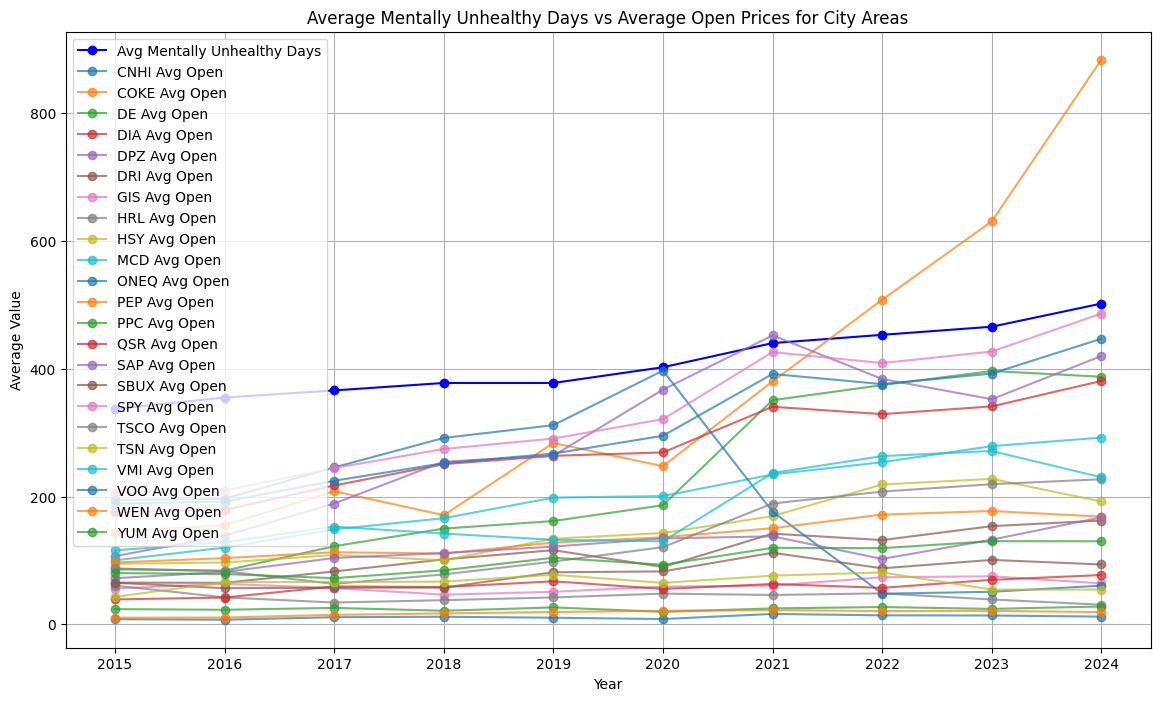

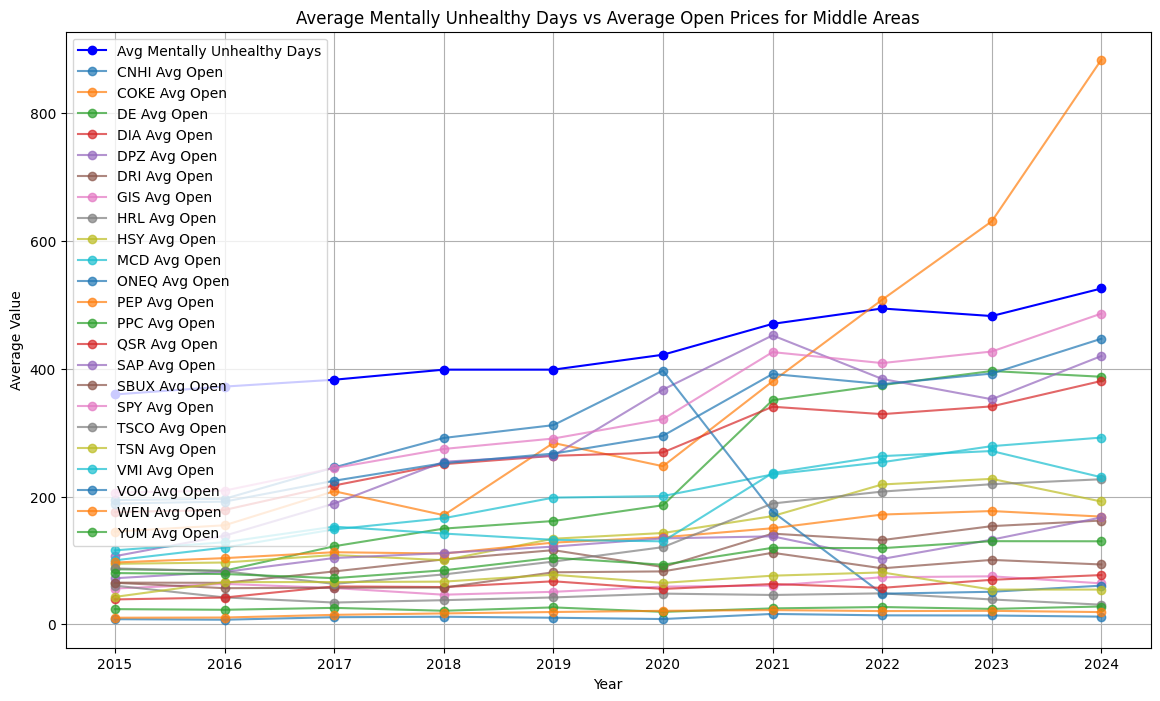

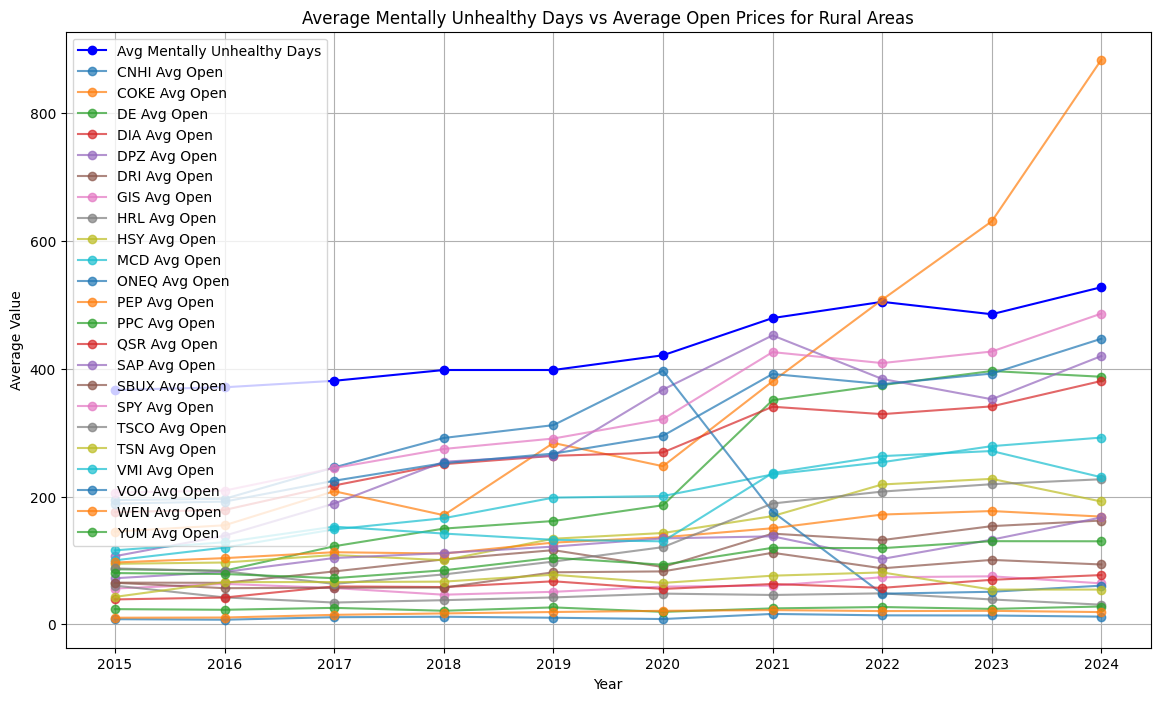

In [74]:
import matplotlib.pyplot as plt

# Function to plot average mentally unhealthy days and average open stock prices for each income group
def plot_income_vs_stock(income_level):
    subset = merged_df[merged_df['Area Type'] == income_level]

    # Calculate the average of 'Average Number of Mentally Unhealthy Days' and average 'Open' price for each year
    avg_mentally_unhealthy_days = subset.groupby('Year')['Average Number of Mentally Unhealthy Days'].mean() * 100
    
    # Handle NaNs: If NaN, use the 'Mentally Unhealthy Days' as fallback
    fallback_days = subset.groupby('Year')['Mentally Unhealthy Days'].mean() * 100
    avg_mentally_unhealthy_days = avg_mentally_unhealthy_days.fillna(fallback_days)

    # Calculate the mean of numeric columns (excluding non-numeric data)
    avg_open_price = subset.groupby('Year').mean(numeric_only=True).iloc[:, 18:]  # Adjust this based on where your stock columns start

    # Remove TSN stock from the DataFrame
    if 'CMG' in avg_open_price.columns:
        avg_open_price = avg_open_price.drop(columns=['CMG'])

    # Plotting
    plt.figure(figsize=(14, 8))
    plt.plot(avg_mentally_unhealthy_days.index, avg_mentally_unhealthy_days, label='Avg Mentally Unhealthy Days', color='blue', marker='o')
    
    # Iterate over each remaining stock to plot its average open price
    for stock in avg_open_price.columns:
        plt.plot(avg_open_price.index, avg_open_price[stock], label=f'{stock} Avg Open', alpha=0.7, marker='o')

    plt.title(f'Average Mentally Unhealthy Days vs Average Open Prices for {income_level} Areas')
    plt.xlabel('Year')
    plt.ylabel('Average Value')
    plt.xticks(avg_mentally_unhealthy_days.index)  # Ensure that all years are shown on the x-axis
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot for City Area Type
plot_income_vs_stock('City')

# Plot for Middle Area Type
plot_income_vs_stock('Middle')

# Plot for Rural Area Type
plot_income_vs_stock('Rural')


In [77]:
! pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.7 MB/s eta 0:00:00


In [86]:
import pandas as pd
from scipy.stats import pearsonr
import statsmodels.api as sm

def calculate_partial_correlations(area_type, control_stock='DIA'):
    subset = merged_df[merged_df['Area Type'] == area_type]

    # Calculate the average of 'Average Number of Mentally Unhealthy Days' and average 'Open' price for each year
    avg_mentally_unhealthy_days = subset.groupby('Year')['Average Number of Mentally Unhealthy Days'].mean() * 300
    
    # Handle NaNs: If NaN, use the 'Mentally Unhealthy Days' as fallback
    fallback_days = subset.groupby('Year')['Mentally Unhealthy Days'].mean() * 300
    avg_mentally_unhealthy_days = avg_mentally_unhealthy_days.fillna(fallback_days)

    # Calculate the mean of numeric columns (excluding non-numeric data)
    avg_open_price = subset.groupby('Year').mean(numeric_only=True).iloc[:, 18:]  # Adjust this based on where your stock columns start

    # Remove TSN stock from the DataFrame
    if 'TSN' in avg_open_price.columns:
        avg_open_price = avg_open_price.drop(columns=['TSN'])

    # Ensure the control stock (DIA) is present in the data
    if control_stock in avg_open_price.columns:
        control_variable = avg_open_price[control_stock]
        avg_open_price = avg_open_price.drop(columns=[control_stock])
    else:
        raise ValueError(f"Control stock {control_stock} not found in the data.")

    # Regress each stock and the mentally unhealthy days against DIA and get the residuals
    residuals = {}
    for stock in avg_open_price.columns:
        X = sm.add_constant(control_variable)  # Add constant for intercept
        model_stock = sm.OLS(avg_open_price[stock], X).fit()
        model_mhd = sm.OLS(avg_mentally_unhealthy_days, X).fit()
        
        # Store residuals
        residuals[stock] = model_stock.resid
    
    # Residuals for mentally unhealthy days
    residuals_mhd = model_mhd.resid

    # Calculate the partial correlation between residuals
    partial_correlations = {}
    for stock, resid_stock in residuals.items():
        partial_correlations[stock] = pearsonr(residuals_mhd, resid_stock)[0]
    
    return partial_correlations

# Calculate partial correlations for each area type
city_partial_correlations = calculate_partial_correlations('City')
middle_partial_correlations = calculate_partial_correlations('Middle')
rural_partial_correlations = calculate_partial_correlations('Rural')

# Display the partial correlations
print("Partial Correlations for City Areas:")
print(city_partial_correlations)
print("\nPartial Correlations for Middle Areas:")
print(middle_partial_correlations)
print("\nPartial Correlations for Rural Areas:")
print(rural_partial_correlations)


Partial Correlations for City Areas:
{'CMG': np.float64(0.6988514783865034), 'CNHI': np.float64(-0.43992599709681984), 'COKE': np.float64(0.7979086329310656), 'DE': np.float64(0.502358396812094), 'DPZ': np.float64(-0.39148836373677987), 'DRI': np.float64(-0.14325309650065637), 'GIS': np.float64(0.72440158656176), 'HRL': np.float64(-0.16085410738098632), 'HSY': np.float64(0.4414259419637504), 'MCD': np.float64(0.39881380447688514), 'ONEQ': np.float64(-0.6492546774863472), 'PEP': np.float64(0.5054570658583115), 'PPC': np.float64(0.09631881503654902), 'QSR': np.float64(-0.2960681491278796), 'SAP': np.float64(-0.16557530337988483), 'SBUX': np.float64(-0.2619401434379866), 'SPY': np.float64(0.7451406292398942), 'TSCO': np.float64(0.6671812957731), 'VMI': np.float64(0.4107243720758155), 'VOO': np.float64(0.7431758220974043), 'WEN': np.float64(-0.6793082112110038), 'YUM': np.float64(0.18992923317104543)}

Partial Correlations for Middle Areas:
{'CMG': np.float64(0.604209316015986), 'CNHI': np

In [87]:
def plot_partial_correlations(correlations, area_type):
    # Create a bar chart
    plt.figure(figsize=(14, 8))
    plt.bar(correlations.keys(), correlations.values(), color='skyblue')
    plt.title(f'Partial Correlations with Mentally Unhealthy Days for {area_type} Areas (Effect of DIA Removed)')
    plt.xlabel('Stock')
    plt.ylabel('Partial Correlation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

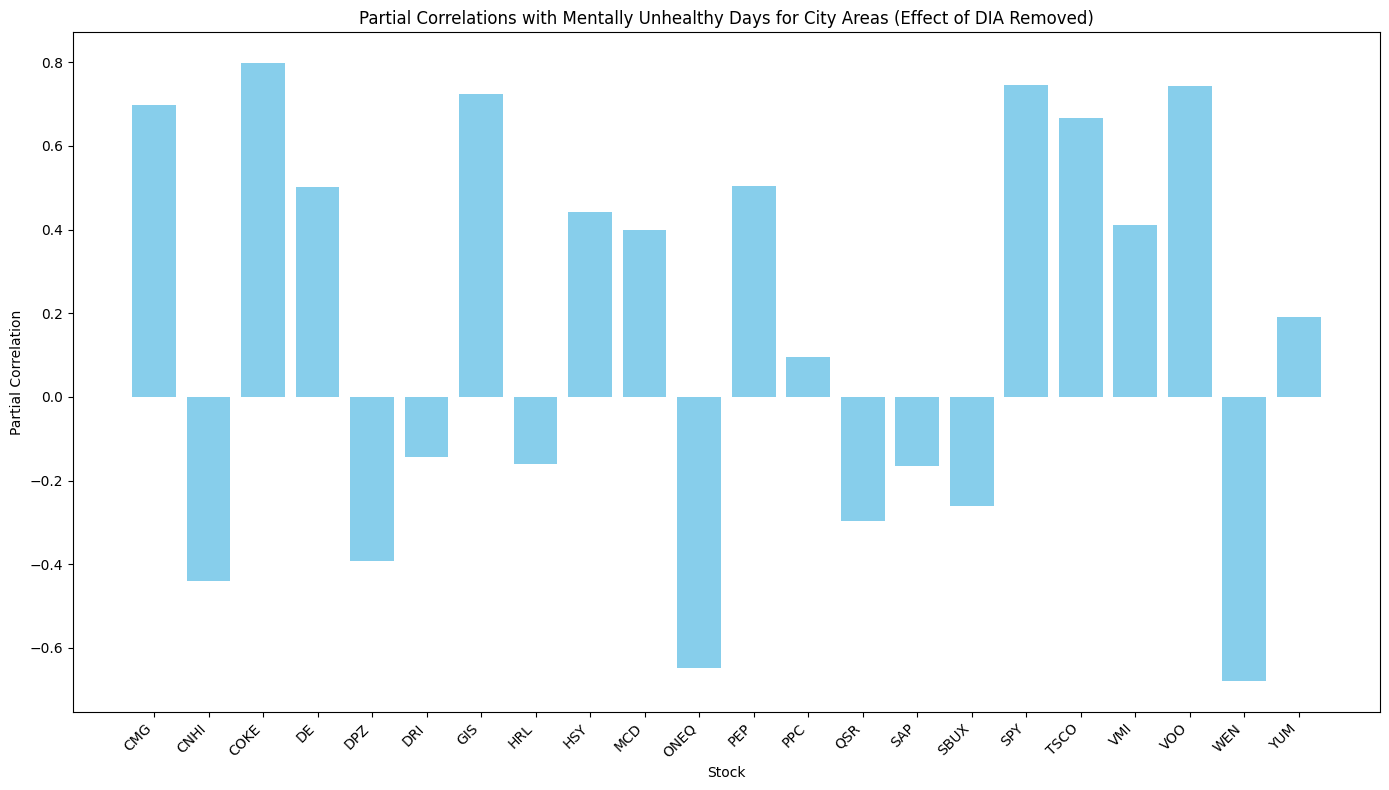

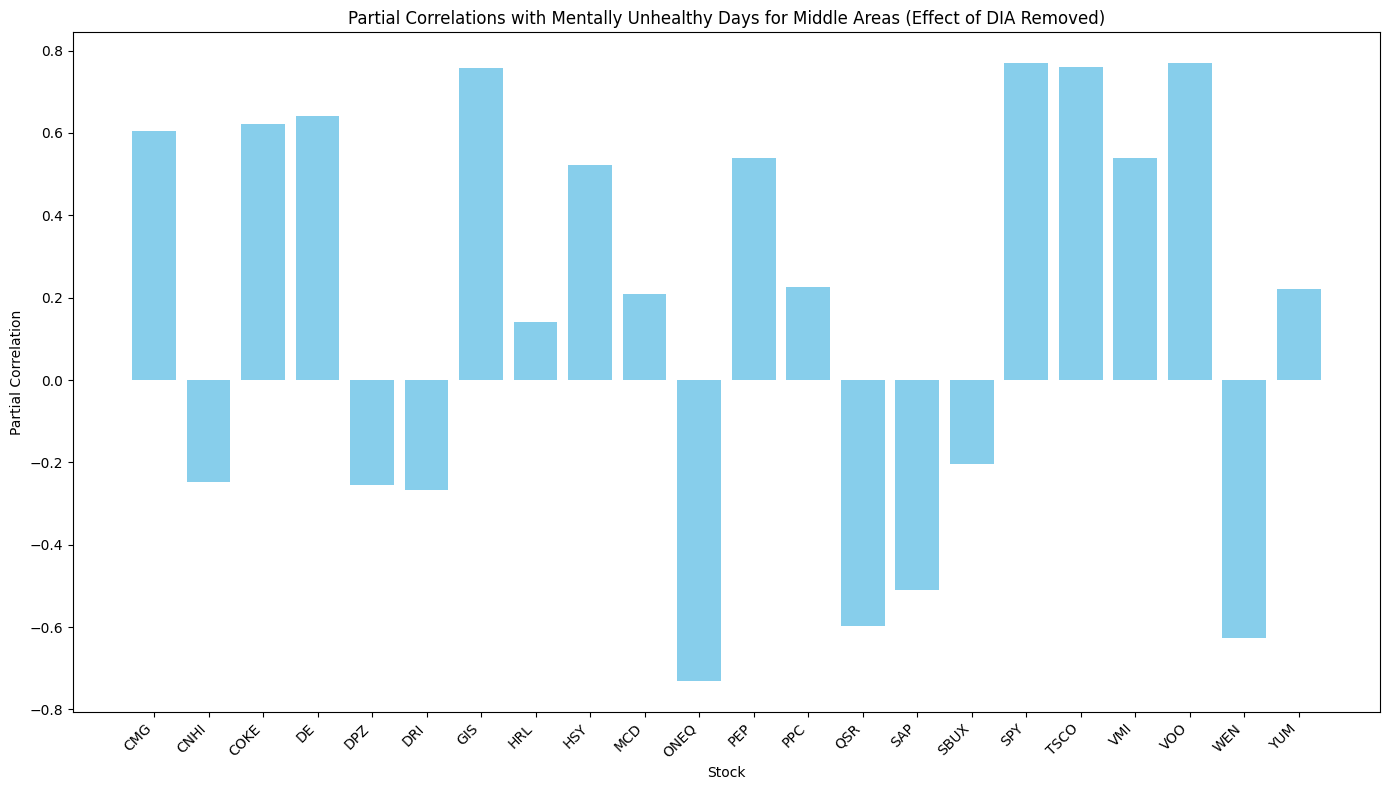

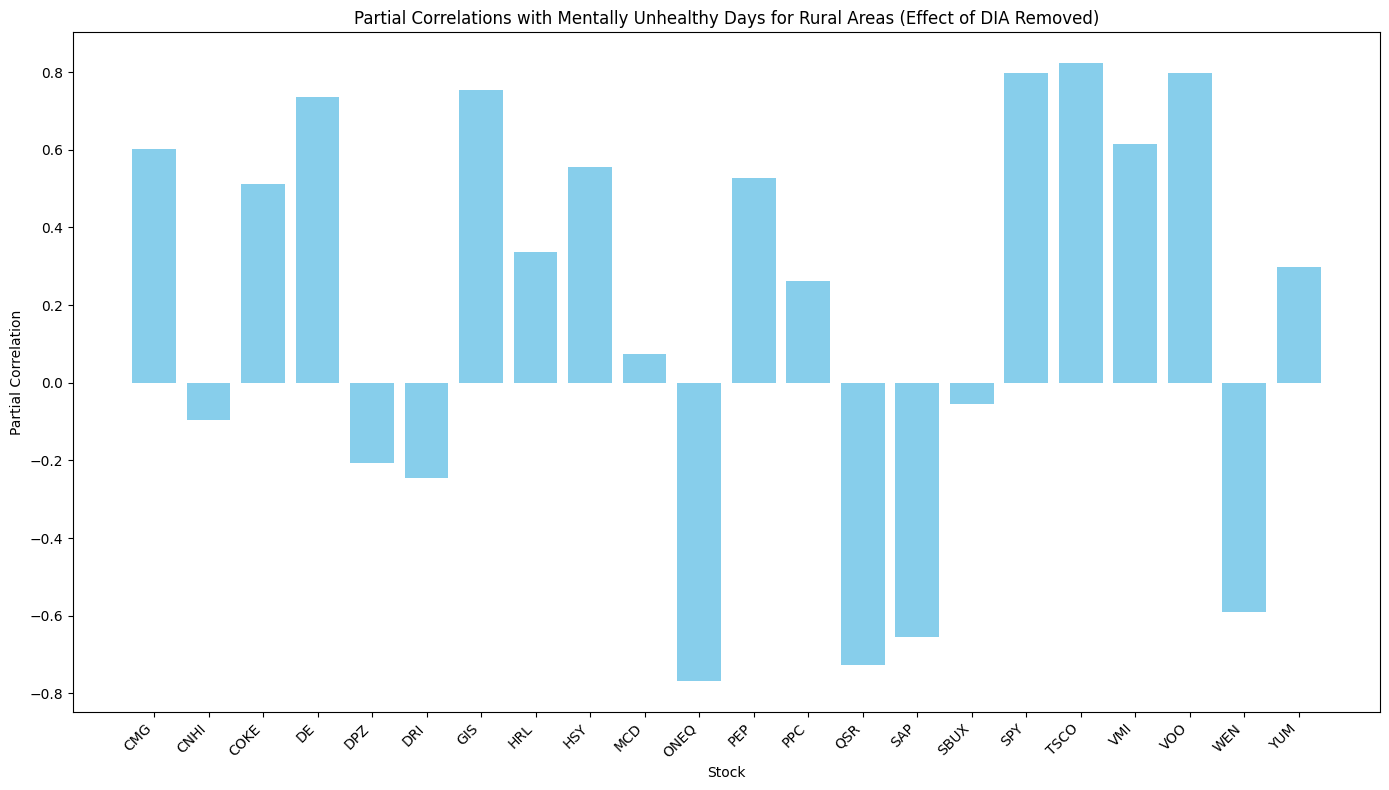

In [88]:
plot_partial_correlations(city_partial_correlations, 'City')
plot_partial_correlations(middle_partial_correlations, 'Middle')
plot_partial_correlations(rural_partial_correlations, 'Rural')